# Case 1 - Hotel customer segmentation 

Alexandre - 20240568 <br>
Diogo Melo - 20240698 <br>
Gonçalo Varanda - 20240691 <br>
Miguel Ferreira - 20240569



>This Notebook uses the "Case1_HotelCustomerSegmentation.csv" dataset

### Dataset description:

Dataset of a Hotel in Portugal, with information and preferences regarding customer bookings.

#### Hotel client data:
- `ID`: numeric - Customer ID
- `age`: numeric - age of the customer
- `namehash`: hash of the customer's name (categorical)
- `docIDhash`: hash of the customer’s personal document identification number (usually a passport or ID card) (categorical)
- `marital`: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- `nationality`: nationality of the customer in ISO 3166-1 (Alpha 3) format (categorical)

#### Related with the bookings:
- `AverageLeadTime`: numeric - Average number of days before arrival date the customer makes bookings
- `LodgingRevenue`: numeric - Total amount of lodging revenue paid by the customer so far
- `OtherRevenue`: numeric - Total amount of other revenue (e.g., food & beverage, spa, etc.) paid by the customer so far
- `PersonNights`: numeric - Total person/nights the customer has stayed at the hotel so far. Persons/Nights are the sum of Adults and Children in each booking, multiplied by the number of Nights(Length-of-stay) of the booking
- `RoomNights`: numeric - Total of room/nights the customer has stayed at the hotel so far. Room/Nights are the multiplication of the number of rooms of each booking by the the number of Nights (Length-of-stay) of the booking
- `DistributionChannel`: Distribution channel normally used by the customer to make bookings at the hotel (categorical: 'Corporate','Travel Agent/Operator','Direct','GDS Systems')
- `MarketSegment`: Current market segment of the customer (categorical: 'Corporate','Travel Agent/Operator','Direct','Aviation','Groups','Complementary','Other')
- `BookingsCanceled`: numeric - Number of bookings the customer made but subsequently canceled
- `BookingsNoShowed`: numeric - Number of bookings the customer made but subsequently made a "no-show"
- `BookingsCheckedin`: numeric - Number of bookings the customer made, which actually ended up staying

#### Preferences: (Indication if the customer usually asks for a...)
- `SRHighFloor`: room in a higher floor (0: No, 1: Yes)
- `SRLowFloor`: room in a lower floor (0: No, 1: Yes) 
- `SRAccessibleRoom`: accessible room (0: No, 1: Yes) 
- `SRMediumFloor`: room in a middle floor (0: No, 1: Yes)
- `SRBathtub`: room with a bathtub (0: No, 1: Yes)
- `SRShower`: room with a shower (0: No, 1: Yes)
- `SRCrib`: crib (0: No, 1: Yes) 
- `SRKingSizeBed`: room with a king size bed (0: No, 1: Yes)
- `SRTwinBed`: room with a twin bed (0: No, 1: Yes)
- `SRNearElevator`: room near the elevator (0: No, 1: Yes)
- `SRAwayFromElevator`: room away from the elevator (0: No, 1: Yes) 
- `SRNoAlcoholInMiniBar`: room with no alcohol in the mini bar (0: No, 1: Yes)
- `SRQuietRoom`: room away from the noise (0: No, 1: Yes)


#### Possible aditional metadata:

- `is_european`: If the customer is european (0: No, 1: Yes)
- `is_portuguese`: If the customer is portuguese (0: No, 1: Yes)
- `nation_by_continent`: Group countries in Continents to reduce high cardinality / or Zones (Ex: North America, South of Europe...)
- `age_category`: Create age categories based on common sense or statistics.



<div class="alert alert-block alert-success">

<a class="anchor" id="1st-bullet">    </a>
## 1. Importing the necessary libraries
    

</div>

In [39]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import ticker


# encoders

# Models

# Metrics 

# Others
#%pip install pycountry
import pycountry

# for better resolution plots and others


<div class="alert alert-block alert-success">

<a class="anchor" id="1st-bullet">    </a>
## 2. Data Understanding
    

</div>

The group started by loading the data a using the *head* function to get a general understanding of the data.

In [40]:
df = pd.read_csv('datasets/Case1_HotelCustomerSegmentation.csv', sep=';', index_col='ID')
df.head()

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,
1,PRT,52.0,440,0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...,0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...,59,292.0,82.3,1,0,...,0,0,0,0,0,0,0,0,0,0
2,PRT,NaN,1385,0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,61,280.0,53.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,DEU,32.0,1385,0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...,0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,FRA,61.0,1385,0xC45D4CD22C58FDC5FD0F95315F6EFA5A6E7149187D49...,0x8E59572913BB9B1E6CAA12FA2C8B7BF387B1D1F3432E...,93,240.0,60.0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,FRA,52.0,1385,0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...,0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


From the start, it was possible to conclude that two columns (`NameHash`, `DocIDHash`) were very likely not to be used, due to the fact that, as the name implied, the data was hashed. The group decided to keep these columns until the data cleaning section where they could be adressed.

### Missing Data

The next step was using the *info* method, this method creates a simplistic view of the data where it is possible to take note of wrong data types (*dtypes*) and null values.

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111733 entries, 1 to 111733
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Nationality           111733 non-null  object 
 1   Age                   107561 non-null  float64
 2   DaysSinceCreation     111733 non-null  int64  
 3   NameHash              111733 non-null  object 
 4   DocIDHash             110732 non-null  object 
 5   AverageLeadTime       111733 non-null  int64  
 6   LodgingRevenue        111733 non-null  float64
 7   OtherRevenue          111733 non-null  float64
 8   BookingsCanceled      111733 non-null  int64  
 9   BookingsNoShowed      111733 non-null  int64  
 10  BookingsCheckedIn     111733 non-null  int64  
 11  PersonsNights         111733 non-null  int64  
 12  RoomNights            111733 non-null  int64  
 13  DistributionChannel   111733 non-null  object 
 14  MarketSegment         111733 non-null  object 
 15  SRHig

Two columns stoud out, `Age` and `DocIDHash`. In the case of `Age` there were various ways of fixing the missing data (e.g. fill using the average age of the customers nationality). `DocIDHash` was "less problematic", as previously mentioned this variable was unlikely to be used due to its nature.

A further table was made to simplify this view and gather an understanding of the dimension of the missing data.

In [42]:
# missing values
# make it into a table where one col is the count of missings and the next is the percentage
missing = df.isna().sum()
missing = missing[missing > 0]
missing = missing.sort_values(ascending=False)
missing = pd.DataFrame(missing, columns=['missing'])
missing['percentage'] = missing['missing'] / df.shape[0] * 100
missing

,missing,percentage
Age,4172,3.733901
DocIDHash,1001,0.895886


### Duplicated Data

Next the group checked for duplicate data using the *duplicated* function.

> eu não sei se podemos dizer q são duplicados sendo q o id é diferente é que o ID neste caso n e a linha do dataset é o customer id deveria ser o unico diferenciador para duplicados. E não há ID's duplicados.

In [43]:
df.duplicated().sum()

#check for duplicate ID's

df.index.duplicated().sum()

np.int64(0)

In [44]:
df_duplicates = df[df.duplicated()]
df_duplicates

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,
595,ROU,38.0,1365,0x71AD7B2E07CAD82195B968B7CDD7961EC953760899B5...,0x9CD129744684370C750190DB02D767653BB96C8119B3...,0,0.0,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0
702,BRA,26.0,1359,0x74E713DA50B1E31F73E557BE97E695F2F91DF974EFCD...,0xB4945744933DB61354AEE815E46203B3BEA62AA339A0...,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1111,PRT,NaN,1345,0x517974F81AFEBB5A7D7364B258EF7E3536190C01850F...,NaN,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1391,PRT,NaN,1340,0x15A713CE687991691A18F6CDC56ABE24979C73CF5D51...,NaN,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1403,PRT,NaN,1340,0x15A713CE687991691A18F6CDC56ABE24979C73CF5D51...,NaN,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105601,PRT,NaN,84,0x15A713CE687991691A18F6CDC56ABE24979C73CF5D51...,NaN,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
107560,PRT,NaN,69,0xF1465EC9E2D0027094B7C3D72772A862A635E461FFFC...,NaN,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
107561,PRT,NaN,69,0xF1465EC9E2D0027094B7C3D72772A862A635E461FFFC...,NaN,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# Drop the duplicated rows

df = df.drop_duplicates()

In [46]:
#Make sure the rows were properly dropped
df.duplicated().sum()


np.int64(0)

### Investigating strange values

The group used the *describe* function to look for any values that looked out of place, such as ages that where far above (or bellow) the expected range.

In [47]:
df.describe()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,107530.000000,111622.000000,111622.000000,111622.000000,111622.000000,111622.000000,111622.000000,111622.000000,111622.000000,111622.000000,...,111622.000000,111622.000000,111622.000000,111622.000000,111622.000000,111622.000000,111622.000000,111622.000000,111622.000000,111622.000000
mean,45.639896,595.093073,60.889681,284.099843,64.742000,0.002284,0.000600,0.738188,4.332049,2.205694,...,0.000770,0.003136,0.001631,0.016180,0.363513,0.156896,0.000331,0.003601,0.000197,0.087760
std,17.244365,374.657246,85.136441,379.225059,123.625797,0.080672,0.028231,0.730932,4.631061,2.301791,...,0.027747,0.055909,0.040347,0.126166,0.481013,0.363704,0.018204,0.059904,0.014038,0.282948
min,-10.000000,36.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,288.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.000000,522.000000,21.000000,208.200000,31.000000,0.000000,0.000000,1.000000,4.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,58.000000,889.000000,95.000000,393.600000,84.000000,0.000000,0.000000,1.000000,6.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,123.000000,1385.000000,588.000000,21781.000000,8859.250000,15.000000,3.000000,76.000000,116.000000,185.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The group observed the presence of negative values in the columns `Age` and `AverageLeadTime`. These values required further atention so the group decided to investigate these rows.

In [48]:
# maybe just replace by mean of Nationality and DistributionChannel or MarketSegment
df[df["Age"] < 0]

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,
2053,BIH,-6.0,1324,0xB715504C2E85AA4DDCA6A8B149CB79F73F401C5344A0...,0x9ED63F460C900B662B890A825398EA74E2AB649383BB...,0,0.00,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
2469,ATF,-6.0,1319,0x37BDAE928BB1B43CF2DF052D72361EDEB60912B1CEB5...,0x335624ED7784B64693ACA7AE496D17AB8B4D1FECB0FA...,0,0.00,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
5128,FRA,-8.0,1271,0x98C0A7B15C1EFE465B2F49992DDB2AEEBD6E36544A8D...,0x8E0392C5D36615A020644CC4B910B7F95C4CA6E919E0...,66,93.30,14.00,0,0,...,0,0,0,0,1,0,0,0,0,0
6752,GBR,-10.0,1243,0x8CCCC4A546151AF5A0B1AFF3217ED72A8AC7E3057BD2...,0xE4BA150277C08ADEE04304BE69BBB15790BD8A3F31D8...,22,450.00,18.00,0,0,...,0,0,0,0,1,0,0,0,0,0
8361,DEU,-6.0,1217,0x4E8F0C5ECDEB3D0AD6E10C95F3910287EE9DD117142C...,0xF33AEF1FC174F89346F4BE36A0B0850B264802C28A00...,256,126.00,109.00,0,0,...,0,0,0,0,0,1,0,0,0,0
8629,NLD,-9.0,1213,0x8BDF931F9F0B596E6227153308A564EEC6D84E74EA5B...,0x8A51E2916F605B51E90ADC7538FD1A0B5770DAB53A78...,111,414.60,34.00,0,0,...,0,0,0,0,1,0,0,0,0,0
9920,DZA,-5.0,1193,0x4DD3955FC0A0B80633A72A1F6F2A855615F39DEC5BC1...,0xD3EBA3BD3BFCB1E5F8E31DCA5E31DC4E0F50C5029C22...,54,138.93,29.50,0,0,...,0,0,0,0,1,0,0,0,0,0
10663,DEU,-9.0,1181,0x92501E90A1E834DCAB204F4CC11FE3DAE5AC269FE298...,0x5259A45D8A6404579086892C6E99A8436D4C87EF838C...,292,126.00,113.00,0,0,...,0,0,0,0,0,0,0,0,0,0
10695,DEU,-9.0,1181,0x8951768FA5231187E60D24B3540271A2693FDDA0D8EC...,0x1020D6B8DF33486CC701BEB0173833E5FA028482395F...,292,128.00,57.50,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
df[df["AverageLeadTime"] < 0]

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,
23064,PRT,NaN,964,0x498F10CD065519D5A08A680309214C7911457CF2A5CC...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,-1,352.00,30.0,0,0,...,0,0,0,0,0,0,0,0,0,0
29374,USA,25.0,870,0xEEE451C018A695CC592A21016B9713CCE1CAD0CEF039...,0x855CC6ADF35259086B24B2639DD34563A20FD464BF0B...,-1,77.49,3.0,0,0,...,0,0,0,0,0,0,0,0,0,0
51375,CHN,33.0,558,0x61B41490861314B7148F76EE7D7E17A240A86B45259D...,0x4CDEF046A3A97AAC6BD603F2250C8ACCB068C39995C4...,-1,129.00,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
58655,FRA,57.0,499,0x7E60C14F1CDF540841373495CA352FA8579EA1166911...,0xD3D49D29C16B32E2DF23CB16128500175E12671B6DD3...,-1,149.00,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
58662,FRA,62.0,499,0x8F817FC15C5606A27141C5FF717456FA9D3D7CE71A48...,0xE71E1E35741B667B50E3BDAD6AE5AE2283DDA0FE50F5...,-1,149.00,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
58676,FRA,61.0,499,0x7DD53BA3E94C8D8B171B9D50041DC3A23E6F4752A3A8...,0x814B89362FCA5770AEDC4485136D7F673F78793CE218...,-1,149.00,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
60590,ESP,46.0,485,0xBBBA5623819CD060BB49D9D700348FFEF885F825D019...,0x54D0B32490EA6DAB16F26AFBDAD5037A89E1BDA62B54...,-1,159.00,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
62690,USA,70.0,468,0x4567E92118939CF20A432369E32BA8959502682AD473...,0x2A1EA7292AF2D9BB083726E0961A38A54950480886BA...,-1,95.20,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
68486,GBR,46.0,424,0x2FFEF9FB8750A5B78550558BCAB6E6FE0EEFB92B53F9...,0x8FDCAADFD9772221E36C47D962BF5BEFC049103778EC...,-1,282.00,24.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In both cases the negative values amounted to a very small percentage of the data. As such the group decided that the simplest way to deal with this values was to simply remove them, this was done in the data cleaning section.

<div class="alert alert-block alert-success">

<a class="anchor" id="1st-bullet">    </a>
## 3. Exploratory Data Analysis
    

</div>

### Booking Variables

After completing the Data Understanding the group moved to the EDA section. The first variables the group looked into were the "bookings variables".

The group wanted to look into the number of reservations that were cancled, to ahcieve this goal a table was created featuring the number of costumers that had canceled *x* bookings.

In [50]:
bookings_canceled_counts = df['BookingsCanceled'].value_counts()
bookings_canceled_percentages = (df['BookingsCanceled'].value_counts(normalize=True) * 100).round(5)
bookings_canceled_table = pd.DataFrame({
    'Count': bookings_canceled_counts,
    'Percentage': bookings_canceled_percentages
})
bookings_canceled_table = bookings_canceled_table.sort_index()
bookings_canceled_table

,Count,Percentage
BookingsCanceled,,
0,111456,99.85128
1,125,0.11199
2,19,0.01702
3,11,0.00985
4,8,0.00717
5,1,0.00090
7,1,0.00090
15,1,0.00090


From the table it was possible to conclude that the majority of clients (approximatly 99.9%) haven't canceled a booking. This is followed very losely by 1 cancelation with 125 clients (or about 0.1%).

This process was repeated for the column `BookingsNoShowed`.

In [51]:
bookings_no_showed_counts = df['BookingsNoShowed'].value_counts()
bookings_no_showed_percentages = (df['BookingsNoShowed'].value_counts(normalize=True) * 100).round(5)
bookings_no_showed_table = pd.DataFrame({
    'Count': bookings_no_showed_counts,
    'Percentage': bookings_no_showed_percentages
})
bookings_no_showed_table = bookings_no_showed_table.sort_index()
bookings_no_showed_table

,Count,Percentage
BookingsNoShowed,,
0,111565,99.94893
1,48,0.04300
2,8,0.00717
3,1,0.00090


Much like the previous table, the majority of clients have shown up for all their bookings. In this case the percentage of clients who have missed one booking is even less with 48 clients (or approximatly 0.4%)

This process was repeated one last time for `BookingsCheckedIn`.

In [52]:
bookings_checked_in_counts = df['BookingsCheckedIn'].value_counts()
bookings_checked_in_percentages = (df['BookingsCheckedIn'].value_counts(normalize=True) * 100).round(5)
bookings_checked_in_table = pd.DataFrame({
    'Count': bookings_checked_in_counts,
    'Percentage': bookings_checked_in_percentages
})
bookings_checked_in_table = bookings_checked_in_table.sort_index()
bookings_checked_in_table

,Count,Percentage
BookingsCheckedIn,,
0,33104,29.65724
1,76457,68.49635
2,1634,1.46387
3,201,0.18007
4,57,0.05107
5,33,0.02956
6,19,0.01702
7,30,0.02688
8,12,0.01075


This table presented an interesting insight, about 30% of the clients in the data base hadn't ever checked into a booking. Noticing this the group proposed two possibilities:

1. These are data entry errors. This outcome seemed unlikely due to the sheer volume of clients without checkins.

2. These were clients who had given their data in the hotel's website, to a travel aggency or directly to the hotel and ultimatly decided no to book a room. These clients (or at least the ones who had 0's in all "booking variables") could be clients who gave up on the hotel.

### `PersonNights`
`PersonNights` was created using the following formula:

$$
\text{PersonNights} = (\text{Number of Adults} + \text{Number of Children}) \times \text{Number of Nights}
$$

A high `PersonNights` value might represent guests who stayed longer or in larger groups, which could translate into higher revenue from hotel services.


In [53]:
persons_nights_description = df['PersonsNights'].describe().reset_index()
persons_nights_description.columns = ['Statistic', 'Value']
persons_nights_description

,Statistic,Value
0,count,111622.000000
1,mean,4.332049
2,std,4.631061
3,min,0.000000
4,25%,0.000000
5,50%,4.000000
6,75%,6.000000
7,max,116.000000


On average the value of the `PersonNights` is about 4 but when looking at the minimum and the first quartile values it was possible to conclude that there were about 25% of customers with a 0 `PersonNights`. This could only mean that these clients did not spend any night at the hotel. This is due to the fact that in the formula, the first part (*Number of Adults + Number of Children*) has to be at least 1. The maximum value is also note worthy as it stands out from the maximum by more then 100 `PersonNights`.

### `RoomNights `

`RoomNights` is given by the following formula:

$$
\text{RoomNights} = \text{Number of Rooms} \times \text{Number of Nights}
$$

In [54]:
room_nights_description = df['RoomNights'].describe().reset_index()
room_nights_description.columns = ['Statistic', 'Value']
room_nights_description

,Statistic,Value
0,count,111622.000000
1,mean,2.205694
2,std,2.301791
3,min,0.000000
4,25%,0.000000
5,50%,2.000000
6,75%,3.000000
7,max,185.000000


`RoomNights` behaved simmilarly to the previous variable. Its mean and std were both approximatly 2, the minimum and first quartile were 0, and the maximum was further away from the 75% quarter then the previous variable was. Again these values reflected that a quarter of the clients hadn't booked a room.

The findings from these two variables furthered the groups belief in the theory that this database had clients who had not made a booking.

### `DistributionChannel`

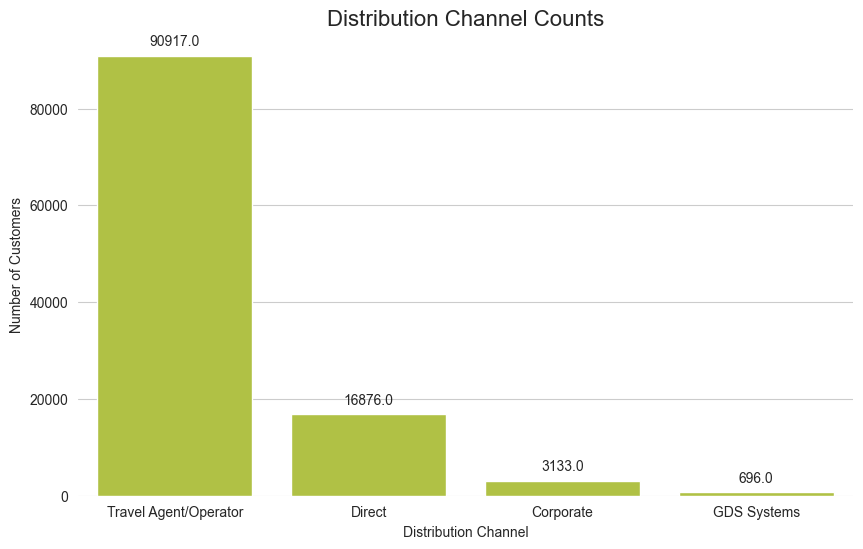

In [55]:
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
sns.countplot(data=df, x='DistributionChannel', order=df['DistributionChannel'].value_counts().index, color='#bfd630')
plt.title('Distribution Channel Counts', size=16)
sns.despine(bottom=True, left=True)
plt.xlabel('Distribution Channel')
plt.ylabel('Number of Customers')
# Add count labels on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

Regarding the `DistributionChannels` it was apparent that most of the Bookings were made using "Travel Agents/Operators". The "category" that followed the closest was "Direct" altough there was a large gap between it and the first one. Both "Corporate" and "GDS Systems" represented a small percentage of bookings.

### `MarketSegment`

In [85]:
market_segment_counts = df["MarketSegment"].value_counts()
market_segment_percentages = (df["MarketSegment"].value_counts(normalize=True) * 100).round(5)
market_segment_table = pd.DataFrame({
    'Count': market_segment_counts,
    'Percentage': market_segment_percentages
})
market_segment_table = market_segment_table.sort_index()
market_segment_table

,Count,Percentage
MarketSegment,,
Aviation,288,0.25801
Complementary,655,0.58680
Corporate,2931,2.62583
Direct,16358,14.65482
Groups,11450,10.25783
Other,63593,56.97174
Travel Agent/Operator,16347,14.64496


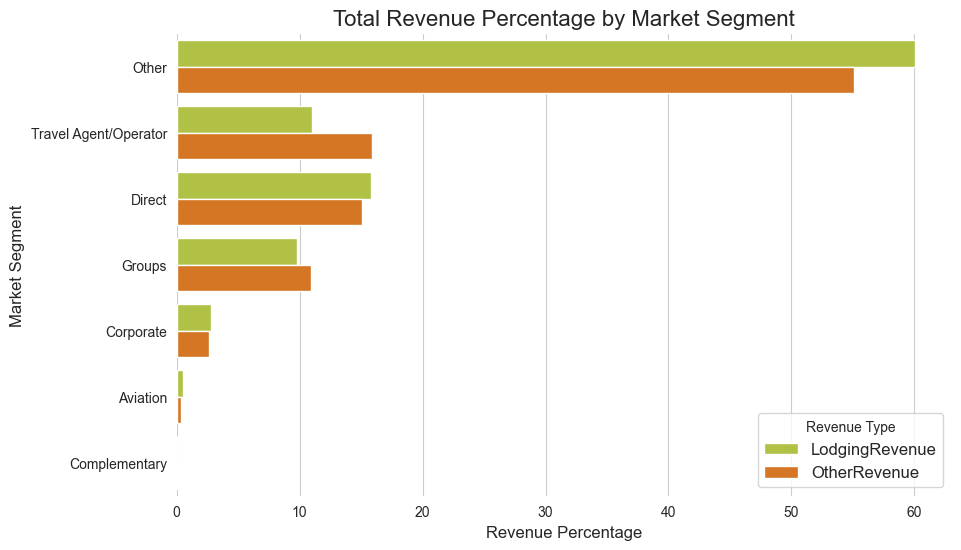

In [ ]:
total_lodging_revenue = df['LodgingRevenue'].sum()
total_other_revenue = df['OtherRevenue'].sum()
revenue_by_market = df.groupby('MarketSegment')[['LodgingRevenue', 'OtherRevenue']].sum().reset_index()
revenue_by_market['LodgingRevenue'] = (revenue_by_market['LodgingRevenue'] / total_lodging_revenue) * 100
revenue_by_market['OtherRevenue'] = (revenue_by_market['OtherRevenue'] / total_other_revenue) * 100
revenue_melted = revenue_by_market.melt(id_vars="MarketSegment", var_name="RevenueType", value_name="RevenuePercentage")
revenue_melted = revenue_melted.sort_values(by="RevenuePercentage", ascending=False)

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x="RevenuePercentage", y="MarketSegment", hue="RevenueType", data=revenue_melted, palette=["#bfd630", "#f27405"])
plt.xlabel("Revenue Percentage", fontsize=12)
plt.ylabel("Market Segment", fontsize=12)
plt.legend(title="Revenue Type", loc='lower right', fontsize=12)
plt.title("Total Revenue Percentage by Market Segment", fontsize=16)
sns.despine(left=True, bottom=True)
plt.show()

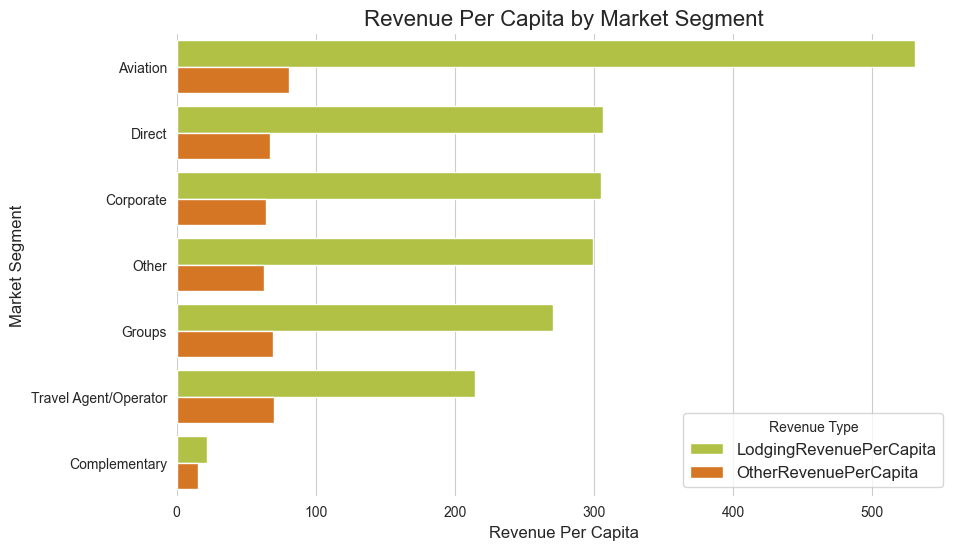

In [83]:
customers_per_market = df['MarketSegment'].value_counts().reset_index()
customers_per_market.columns = ['MarketSegment', 'CustomerCount']
revenue_by_market = df.groupby('MarketSegment')[['LodgingRevenue', 'OtherRevenue']].sum().reset_index()
revenue_by_market = revenue_by_market.merge(customers_per_market, on='MarketSegment')
revenue_by_market['LodgingRevenuePerCapita'] = revenue_by_market['LodgingRevenue'] / revenue_by_market['CustomerCount']
revenue_by_market['OtherRevenuePerCapita'] = revenue_by_market['OtherRevenue'] / revenue_by_market['CustomerCount']
revenue_by_market = revenue_by_market.sort_values(by='LodgingRevenuePerCapita', ascending=False)
revenue_melted = revenue_by_market.melt(id_vars="MarketSegment", value_vars=['LodgingRevenuePerCapita', 'OtherRevenuePerCapita'], 
                                        var_name="RevenueType", value_name="RevenuePerCapita")

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x="RevenuePerCapita", y="MarketSegment", hue="RevenueType", data=revenue_melted, palette=["#bfd630", "#f27405"])
plt.xlabel("Revenue Per Capita", fontsize=12)
plt.ylabel("Market Segment", fontsize=12)
plt.legend(title="Revenue Type", loc='lower right', fontsize=12)
plt.title("Revenue Per Capita by Market Segment", fontsize=16)
sns.despine(left=True, bottom=True)
plt.show()

### Nationalities

In [61]:
len(df["Nationality"].unique())

199

There were 199 nationalities in the data, the group decide to add the actual country names along the ISO codes.

In [57]:
# Function to get country names from ISO alpha-3 codes
def get_country_name(alpha3_code):
    try:
        return pycountry.countries.get(alpha_3=alpha3_code).name
    except AttributeError:
        return 'Unknown code'

# Apply the function to the 'nationality' column
df['country_name'] = df['Nationality'].apply(get_country_name)
df['country_name'].unique()


array(['Portugal', 'Germany', 'France', 'Japan', 'Ireland', 'Spain',
       'Belgium', 'Netherlands', 'Austria', 'Italy', 'China',
       'Russian Federation', 'Poland', 'United States', 'Hungary',
       'Costa Rica', 'Mexico', 'Switzerland', 'Romania', 'United Kingdom',
       'Bosnia and Herzegovina', 'Brazil', 'Finland', 'Angola', 'Canada',
       'South Africa', 'Taiwan, Province of China', 'Greece', 'Australia',
       'Israel', 'Bulgaria', 'Saudi Arabia', 'Sweden', 'Argentina',
       'Armenia', 'Chile', 'Morocco', 'Mozambique', 'Korea, Republic of',
       'Tunisia', 'Denmark', 'Norway', 'Malaysia', 'Egypt', 'India',
       'Croatia', 'Cabo Verde', 'Jordan',
       'Congo, The Democratic Republic of the', 'Algeria', 'Luxembourg',
       'Türkiye', 'Iran, Islamic Republic of', 'Libya', 'Panama',
       'Colombia', 'Venezuela, Bolivarian Republic of', 'Guinea-Bissau',
       'Czechia', 'Andorra', 'Slovenia', 'Peru',
       'French Southern Territories', 'Uganda', 'Azerbaijan',
  

In [60]:
df[df['country_name'] == "Unknown code"]

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,country_name
ID,,,,,,,,,,,,,,,,,,,,,


One country was unkown, its code was TMP. After researching the group came to the conclusion that these code was actually reffering to Timor Leste. This code had to be changed to its newer version.

Reference:<br>
https://www.iso.org/obp/ui/#iso:code:3166:TP

In [59]:
df['country_name'].replace('Unknown code', 'Timor-Leste', inplace= True)
df['Nationality'].replace('TMP', 'TLS', inplace= True)

C:\Users\alexr\AppData\Local\Temp\ipykernel_3156\1159821334.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country_name'].replace('Unknown code', 'Timor-Leste', inplace= True)
C:\Users\alexr\AppData\Local\Temp\ipykernel_3156\1159821334.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

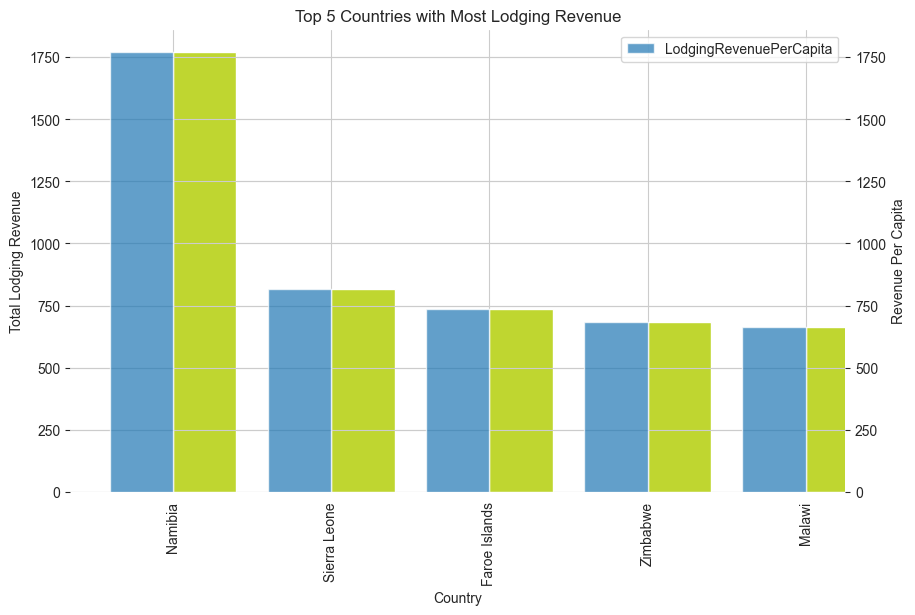

In [94]:
# Calculate total lodging revenue per nationality
total_revenue_per_country = df.groupby('country_name')['LodgingRevenue'].mean()

# Sort by revenue and select top 5 countries
top_5_countries = total_revenue_per_country.nlargest(5)

# Calculate per capita revenue
revenue_by_country = df.groupby('country_name')[['LodgingRevenue', 'OtherRevenue']].sum()
customers_per_country = df['country_name'].value_counts()
revenue_by_country['LodgingRevenuePerCapita'] = revenue_by_country['LodgingRevenue'] / customers_per_country
top_5_countries_per_capita = revenue_by_country.loc[top_5_countries.index, ['LodgingRevenuePerCapita']]

# Plotting
sns.set_style("whitegrid")
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot total lodging revenue
top_5_countries.plot(kind='bar', color='#bfd630', ax=ax1, position=0, width=0.4)
ax1.set_ylabel('Total Lodging Revenue')
ax1.set_xlabel('Country')
ax1.set_title('Top 5 Countries with Most Lodging Revenue')

# Create a secondary y-axis for per capita revenue
ax2 = ax1.twinx()
top_5_countries_per_capita.plot(kind='bar', ax=ax2, position=1, width=0.4, alpha=0.7)
ax2.set_ylabel('Revenue Per Capita')

# Decoration
sns.despine(left=True, bottom=True)
plt.xticks(rotation=0)
plt.show()


## AQUI MENCIONAR Q ESTES CLIENTES DEVEM SER OS MESMOS DO BOOKING (talvez fazer cross reference????)

33 mil clientes que não geraram receita para o hotel: `LodgingRevenue` = 0 e `OtherRevenue` = 0

In [89]:
df[(df['LodgingRevenue'] == 0) & (df['OtherRevenue'] == 0)] #33k obs with zeros everywhere

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,country_name
ID,,,,,,,,,,,,,,,,,,,,,
3,DEU,32.0,1385,0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...,0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,Germany
5,FRA,52.0,1385,0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...,0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,France
7,JPN,50.0,1385,0x94DB830C90A6DA2331968CFC9448AB9A3CE07D7CFEDD...,0x47E5E4B21585F1FD956C768E730604241B380EDFEA68...,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,Japan
9,FRA,43.0,1385,0x44BB41EF2D87698E75B6FBB77A8815BF48DAA912C140...,0x6C456E45A78A20BC794137AE326A81D587B6528B3944...,0,0.0,0.0,0,0,...,0,0,0,1,0,0,0,0,0,France
11,IRL,28.0,1385,0x606584F7B9D6A1905BF9B7ED7B7EBE5DF17DF22FECDF...,0xCA46CD508DB3DB2085374141177E07ECEC4B724AE41C...,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,Ireland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111724,ITA,56.0,37,0x82277FA4AD074DA9786E64E977C94FEF1C2E47CD6212...,0x5ED6055421E857EA3496D4C75FA2237ACD353DB1B64B...,0,0.0,0.0,0,0,...,0,0,0,1,0,0,0,0,0,Italy
111726,PAN,60.0,37,0xAA3529E305173010BADE927C7015FA091C3883D257E9...,0xDC47997245A7B9ACF9D4974149D2100CEB00981A2F03...,0,0.0,0.0,0,0,...,0,0,0,0,1,1,0,0,0,Panama
111729,DEU,31.0,36,0x2F59F0E86596B861C3303585FDB7F090B1B2D70442C5...,0x86AC02B9393E7F58354BA4193D792C07DB91D4BE27C7...,0,0.0,0.0,0,0,...,0,0,0,1,0,0,0,0,0,Germany


232 clientes sem gastos na estadia mas com gastos em comida, spa, etc: `LodgingRevenue` = 0 e `OtherRevenue` > 0

In [90]:
df[(df['LodgingRevenue'] == 0) & (df['OtherRevenue'] != 0)]

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,country_name
ID,,,,,,,,,,,,,,,,,,,,,
59,PRT,NaN,1385,0x51764F97FD9E3426C98D7DFEFE3A2A2D3C724089ECFB...,NaN,0,0.0,2.0,0,0,...,0,0,0,0,0,0,0,0,0,Portugal
267,PRT,NaN,1382,0xE772569A3B92E99EBDE5F2DB0BCAC8E88B03ED52F284...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,44,0.0,4.0,0,0,...,0,0,0,0,0,0,0,0,0,Portugal
290,PRT,NaN,1381,0xF58BB978660EBDA908A5AC6DD9F43509627DCC107110...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,44,0.0,5.5,0,0,...,0,0,0,0,0,0,0,0,0,Portugal
307,ITA,59.0,1381,0xC7CEF7F0CFA36F08235161BC4C44B10A2F295E8E4FEC...,0xCEF6D181A6A57F9F454F3E55EA013F9B5B9822FD70F4...,23,0.0,15.0,0,0,...,0,0,0,0,0,0,0,0,0,Italy
323,PRT,NaN,1381,0xD0FA44B861374D601D25944C91AF07F6341A6E359B12...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,44,0.0,3.0,0,0,...,0,0,0,0,0,0,0,0,0,Portugal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102750,USA,46.0,108,0x286863E22D961B7024574F2BBD9DC925CBBA2E25E697...,0xBDB292A0A25FFACB42A1B09B9AE05D8FE521D52E860C...,236,0.0,87.4,0,0,...,0,0,0,0,0,0,0,0,0,United States
102898,BRA,71.0,107,0x6179F864270084817DC04BE033583189FE982DE102CD...,0xAA59C89DA67951F2966EB54A2F55FCC19A825F19BF4E...,236,0.0,28.0,0,0,...,0,0,0,0,0,0,0,0,0,Brazil
102912,USA,35.0,107,0xF23D30CAEFA9DD2AF7312A187FA3D4D9A71D70649DAA...,0xDB496AAFC493223B0E7D419F892B190F1F492574F66F...,237,0.0,28.0,0,0,...,0,0,0,0,1,0,0,0,0,United States


In [91]:
df[(df['LodgingRevenue'] == 0) & (df['OtherRevenue'] != 0)]['MarketSegment'].value_counts()

MarketSegment
Complementary            147
Groups                    37
Travel Agent/Operator     19
Direct                    18
Corporate                  6
Other                      5
Name: count, dtype: int64

In [92]:
df[(df['LodgingRevenue'] == 0) & (df['OtherRevenue'] != 0) & (df['BookingsCanceled'] == 1)]

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,country_name
ID,,,,,,,,,,,,,,,,,,,,,
4354,PRT,NaN,1285,0x15D0EB4E4C364D793D1D9205D757A88E7BFB3A101849...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,7,0.0,6.0,1,0,...,0,0,0,0,0,0,0,0,0,Portugal
14720,PRT,NaN,1122,0x9465E0AA2ED44F37DA0EDAACB4882A59A3DE66DFC000...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,4,0.0,5.0,1,0,...,0,0,0,1,1,0,0,0,0,Portugal
41836,PRT,69.0,686,0xA8151127487D6D3DCFDB134752A166223267C9C9B231...,0x528C1055DA2E2D1DEB8C84D846B517AE72CE74830F33...,20,0.0,26.0,1,0,...,0,0,0,1,0,0,0,0,0,Portugal
43207,PRT,NaN,651,0x0701CFD5F16F2D68DE51ABEC21C049C7431442F24207...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,1,0.0,6.0,1,0,...,0,0,0,1,0,0,0,0,0,Portugal
71788,PRT,48.0,401,0x6303926D8892037E60B7A372DFE7D2FAD544420B566C...,0x8FEA25577B5C3BD878128DFDF0EE140B7CEBE5F2BFCC...,16,0.0,26.0,1,0,...,0,0,0,1,1,0,0,0,0,Portugal


15 clientes que pagaram em estadia até agora mas não pagaram extras`LodgingRevenue` > 0 e `OtherRevenue` = 0

In [93]:
df[(df['LodgingRevenue'] != 0) & (df['OtherRevenue'] == 0)]

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,country_name
ID,,,,,,,,,,,,,,,,,,,,,
1013,FRA,64.0,1347,0xFD2BA94A5097F72D5AA0B30BF4F4583E7C93F6F2F339...,0x91A8597A774E7D7D6B714AD3429FBE4D0A676313E515...,0,237.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,France
1530,ESP,32.0,1336,0x42235000D0D811D2EA2F92DA14659D6999008EE2E707...,0xFC0AC0A9F074EC881C023C949B40B3358672069E4E1D...,0,79.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,Spain
2102,PRT,29.0,1323,0x9326B4F094BAC1C2335D57C74CF3216354CB2E221F5D...,0x1806379BFC8E84188FC253AEE5C029AB28D35BF3D77A...,0,712.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,Portugal
21043,PRT,31.0,1009,0x7AA2E5D1E992D1BE101665BEC43F9CBB6BC95B966DE5...,0xC46819F7BF45AC988F86FC1B0F2C9ECD6EEA4E00BC60...,6,40.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,Portugal
56728,PRT,43.0,514,0xD4F214185B9A2F34FF1D43A8CC65F1B9DF8BF4D289D1...,0xBFDB1C0A4048835D026686C10AC92CC91CD354B29B0A...,87,154.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,Portugal
63322,AUS,14.0,463,0x1FBC89DDC4F5B81F6DCEA44A1D98F1EA49DE8637A140...,0x7D86380284AD07F008E94881C9198802AE9D89549B28...,98,486.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,Australia
65883,SWE,7.0,444,0xF738F112373AC9D5B4FD58ABFB63629CEF50552C9632...,0x03A0D1FBCE42564D2E625B60971C1B2C0F615CE2776B...,12,513.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,Sweden
80035,PRT,NaN,336,0x7C2CCEE7ADCF83E07306A8ADA983F829BFBD3EC0D713...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,9,109.0,0.0,0,0,...,0,0,0,1,0,0,0,0,0,Portugal
82054,PRT,36.0,311,0xE1DC53786D5801ABC6A5478F564B04A8986EEA7973FD...,0xB43EAE3242E89E810504F09A4961E18F37EF124EF608...,149,44.0,0.0,0,0,...,0,0,0,1,0,0,0,0,0,Portugal


In [119]:
df[(df['LodgingRevenue'] != 0) & (df['BookingsCheckedIn'] == 0)]

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,country_name
ID,,,,,,,,,,,,,,,,,,,,,
70580,PRT,NaN,410,0x68573FCBE31A16536960950762FD290A46A8BDEE8F06...,NaN,114,249.3,18.0,0,0,...,0,0,0,0,0,0,0,0,0,Portugal


In [ ]:
df[(df['BookingsCanceled'] == 0) & (df['BookingsCheckedIn'] == 0) & (df['BookingsNoShowed'] == 0) & (df['LodgingRevenue'] != 0)]

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,country_name
ID,,,,,,,,,,,,,,,,,,,,,
70580,PRT,NaN,410,0x68573FCBE31A16536960950762FD290A46A8BDEE8F06...,NaN,114,249.3,18.0,0,0,...,0,0,0,0,0,0,0,0,0,Portugal


In [94]:
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
binary_features = df.columns[df.columns.str.startswith('SR')].tolist()
metric_features = [feature for feature in numeric_features if feature not in binary_features]
non_metric_features = df.select_dtypes(exclude=[np.number]).columns.tolist()

Histograms

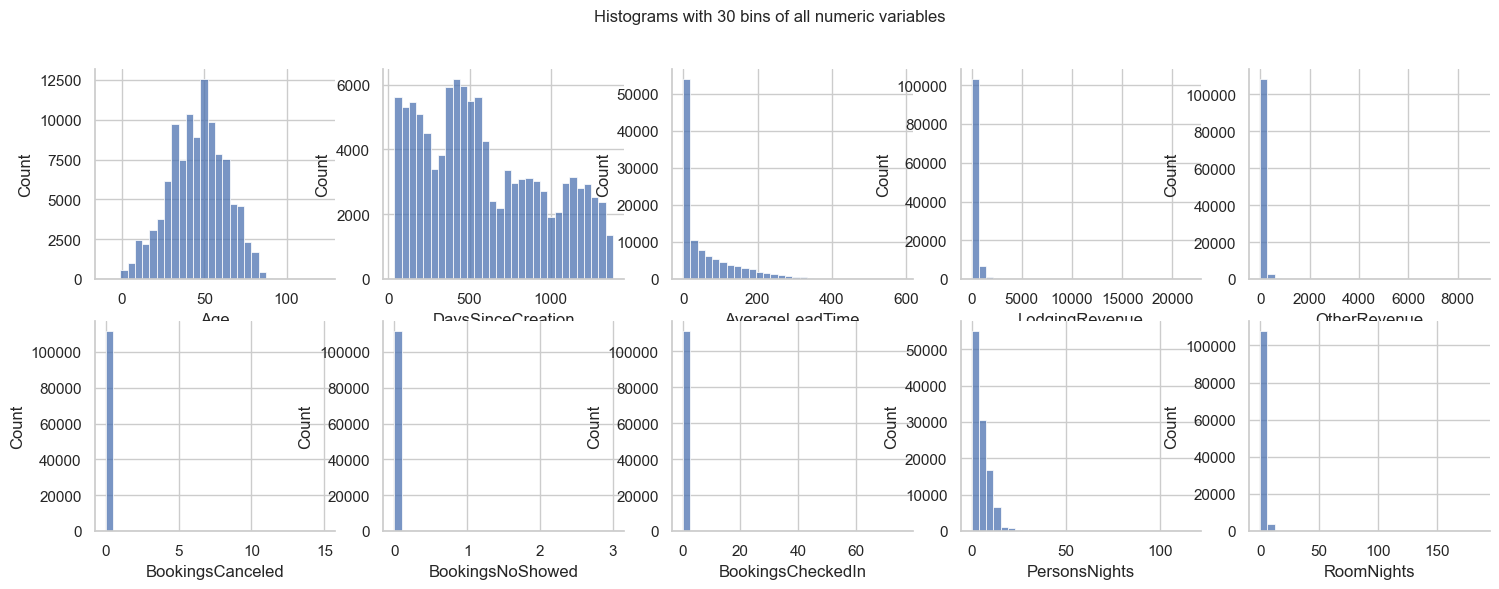

In [95]:
# HISTOGRAM of metric features

# Draw
fig, ax = plt.subplots(2, 5, figsize=(18,6))
for var, subplot in zip(df[metric_features], ax.flatten()):
    g = sns.histplot(data=df,
                bins=30,
                 x=var,
                 ax=subplot,
                 kde=False)

# Decoration
sns.despine()
plt.rc('axes', labelsize=10)
fig.suptitle("Histograms with 30 bins of all numeric variables", fontsize=12);

Scatter Plots

In [96]:
# # Pairwise Relationship of Numerical Variables
# sns.set()

# # Setting pairplot
# sns.pairplot(df[metric_features], diag_kind="hist")

# # Layout
# plt.subplots_adjust(top=0.95)
# plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)
# plt.show()

In [97]:
df_eda = df.copy()

see also dif in total and mean / median

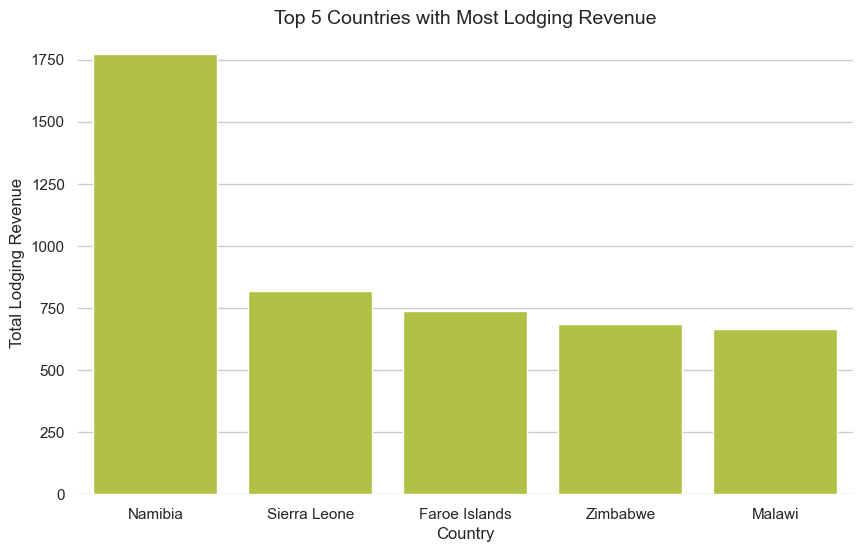

In [98]:
# Calculate total lodging revenue per nationality
total_revenue_per_country = df_eda.groupby('country_name')['LodgingRevenue'].mean()

# Sort by revenue and select top 5 countries
top_5_countries = total_revenue_per_country.nlargest(5).reset_index()

# Set Seaborn style
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x="country_name", y="LodgingRevenue", data=top_5_countries, color='#bfd630')
# Title and Labels
plt.title("Top 5 Countries with Most Lodging Revenue", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Total Lodging Revenue", fontsize=12)

sns.despine(left=True, bottom=True)

# Show the plot
plt.show()

In [99]:
other_revenue_per_country = df_eda.groupby('country_name')["OtherRevenue"].sum()
top_5_countries_other = other_revenue_per_country.nlargest(5).sort_values(ascending=False).reset_index()
top_5_countries_other['OtherRevenue'] = top_5_countries_other['OtherRevenue'] / 1000
top_5_countries_other['OtherRevenue'] = top_5_countries_other['OtherRevenue'].round(2)

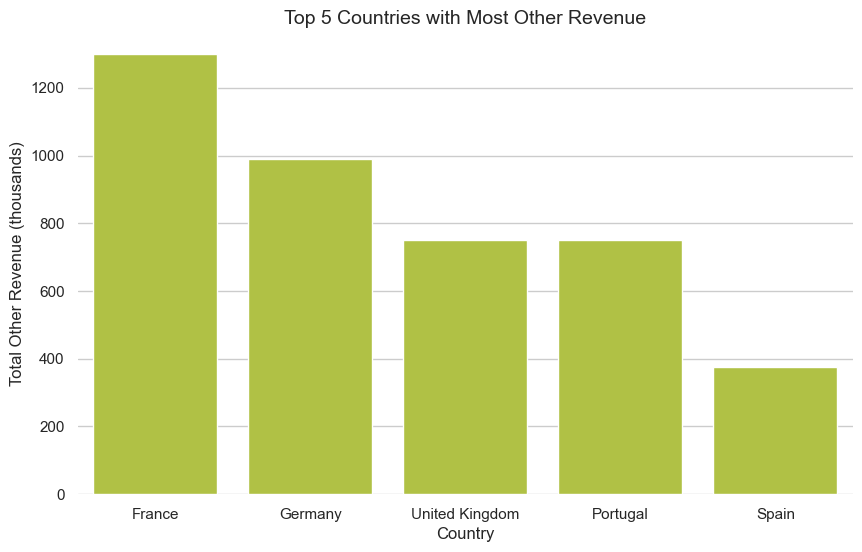

In [100]:
# Set Seaborn style
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x="country_name", y="OtherRevenue", data=top_5_countries_other, color='#bfd630')
# Title and Labels
plt.title("Top 5 Countries with Most Other Revenue", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Total Other Revenue (thousands)", fontsize=12)

sns.despine(left=True, bottom=True)

# Show the plot
plt.show()

Grouping nationalities per continent


In [101]:
continent_nationality = {
    'Europe': [
        'Portugal', 'Germany', 'France', 'Ireland', 'Spain', 'Belgium', 'Netherlands', 'Austria', 'Italy', 'Switzerland', 
        'United Kingdom', 'Hungary', 'Romania', 'Bosnia and Herzegovina', 'Finland', 'Greece', 'Poland', 'Czech Republic', 
        'Russia', 'Slovakia', 'Slovenia', 'Croatia', 'Luxembourg', 'Denmark', 'Estonia', 'Lithuania', 'Latvia', 'Serbia', 
        'Montenegro', 'North Macedonia', 'Albania', 'Kosovo', 'Moldova', 'Monaco', 'San Marino', 'Vatican City', 'Andorra', 
        'Liechtenstein', 'Svalbard', 'Gibraltar', 'Jersey', 'Faroe Islands', 'Bulgaria', 'Sweden', 'Armenia', 'Norway', 'Turkey', 
        'Ukraine', 'Cyprus', 'Malta', 'Belarus', 'Iceland'
    ],
    'Asia': [
        'Japan', 'China', 'Taiwan', 'Israel', 'Afghanistan', 'Nepal', 'Yemen', 'British Indian Ocean Territory', 'Myanmar', 
        'Turkmenistan', 'Kyrgyzstan', 'Laos', 'Tajikistan', 'Uzbekistan', 'Hong Kong', 'Sri Lanka', 'Saudi Arabia', 'South Korea', 
        'Malaysia', 'Jordan', 'Iran', 'India', 'Azerbaijan', 'Kazakhstan', 'Kuwait', 'Indonesia', 'Bahrain', 'Bahamas', 'Thailand', 
        'Papua New Guinea', 'United Arab Emirates', 'Singapore', 'Pakistan', 'Qatar', 'Iraq', 'Georgia', 'Vietnam', 'Lebanon', 'East Timor', 
        'Oman', 'Maldives', 'Syria'
    ],
    'America': [
        'Brazil', 'United States', 'Canada', 'Costa Rica', 'Mexico', 'Bermuda', 'Honduras', 'Trinidad and Tobago', 'Grenada', 
        'French Guiana', 'Saint Vincent and the Grenadines', 'U.S. Virgin Islands', 'Haiti', 'United States Minor Outlying Islands', 
        'Bahamas', 'Falkland Islands', 'Antigua and Barbuda', 'Cayman Islands', 'Nicaragua', 'Saint Pierre and Miquelon', 'Saint Kitts and Nevis', 
        'Puerto Rico', 'Suriname', 'Argentina', 'Chile', 'Panama', 'Colombia', 'Venezuela', 'Peru', 'Uruguay', 'Jamaica', 'Ecuador', 
        'Paraguay', 'Bolivia', 'Barbados', 'Cuba', 'Dominica', 'El Salvador', 'Anguilla', 'Aruba', 'Dominican Republic', 'Guyana', 
        'Saint Lucia', 'Guatemala'
    ],
    'Africa': [
        'Angola', 'South Africa', 'Burundi', 'Burkina Faso', 'Niger', 'Chad', 'Malawi', 'Somalia', 'Swaziland', 'Guinea', 'Madagascar', 
        'Equatorial Guinea', 'Eritrea', 'Botswana', 'Zimbabwe', 'Benin', 'Ethiopia', 'Comoros', 'Sierra Leone', 'Sudan', 'São Tomé and Príncipe', 
        'Central African Republic', 'Mauritania', 'Kenya', 'Togo', 'Morocco', 'Mozambique', 'Tunisia', 'Egypt', 'Cape Verde', 'Guinea-Bissau', 
        'Libya', 'Algeria', 'Democratic Republic of the Congo', 'Uganda', 'Namibia', 'Tanzania', 'Mali', 'Cameroon', 'Seychelles', 'Gabon', 
        'Senegal', 'Nigeria', 'Rwanda', 'Ivory Coast', 'Mauritius', 'Ghana'
    ],
    'Oceania': [
        'Australia', 'Cook Islands', 'Federated States of Micronesia', 'Tonga', 'Fiji', 'Pitcairn Islands', 'Nauru', 'Samoa', 
        'Wallis and Futuna', 'Papua New Guinea', 'American Samoa', 'Kiribati', 'New Caledonia', 'New Zealand', 'French Polynesia'
    ],
    'Antartida': [
        'French Southern and Antarctic Lands', 'Antarctica'
    ]
}


fazer os dois graficos acima com o dicionario por continente

In [111]:
import plotly.express as px

In [110]:
%pip install nbformat

import nbformat
import plotly.express as px

customers_per_country = df_eda['country_name'].value_counts().reset_index()
customers_per_country.columns = ['country_name', 'count']

#Create CHOROPLETH MAP
fig = px.choropleth(customers_per_country, 
                    locations="country_name", 
                    locationmode = "country names",
                    color="count", 
                    hover_name="country_name", 
                    color_continuous_scale="Viridis",
                    title="Number of Customers per Country")
fig.show()

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

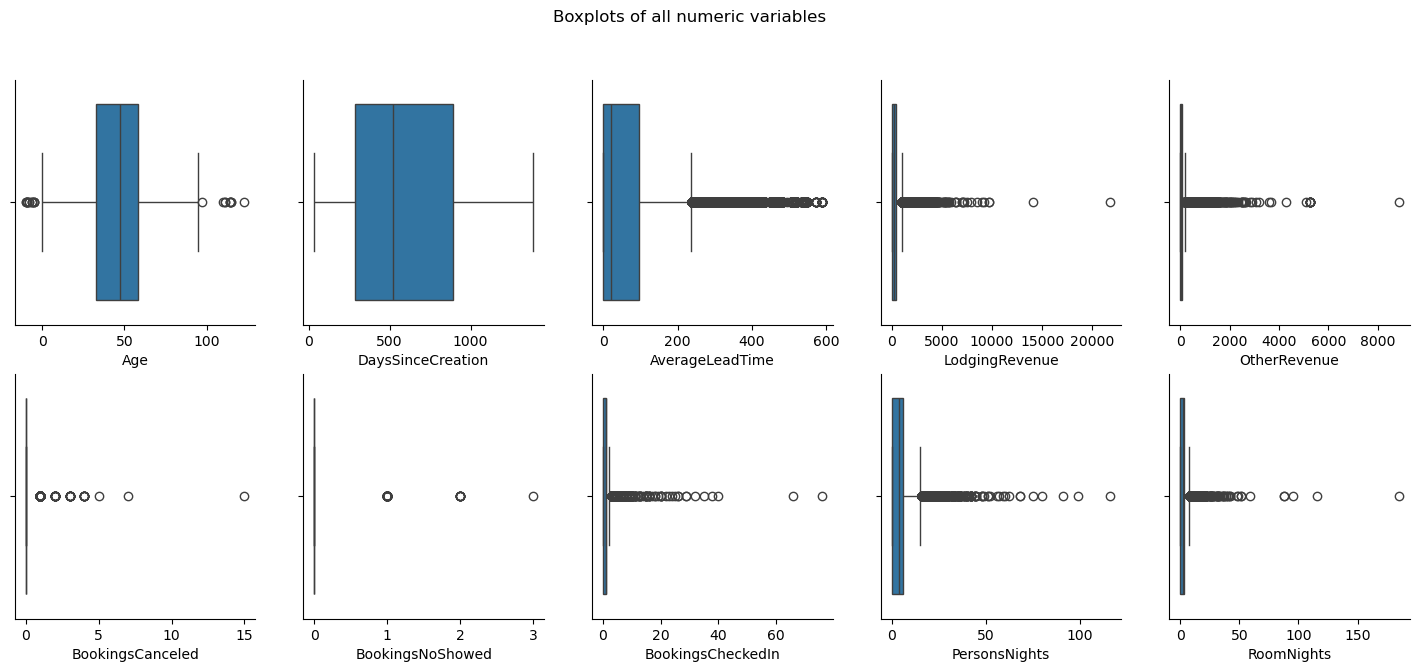

In [ ]:
# BOXPLOT (Metric Features)

metric_features = ['Age', 'DaysSinceCreation', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn',
                   'PersonsNights', 'RoomNights']

# Draw
fig, ax = plt.subplots(2, 5, figsize=(18,7))
for var, subplot in zip(df[metric_features], ax.flatten()):
    g = sns.boxplot(data=df,
                 x=var,
                 ax=subplot)

# Decoration
sns.despine()
plt.rc('axes')
fig.suptitle("Boxplots of all numeric variables");

Binary Feature Visualisations

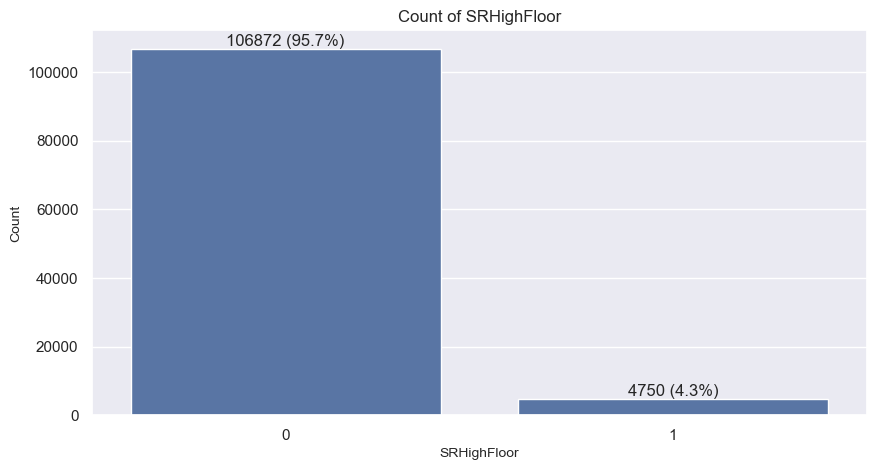

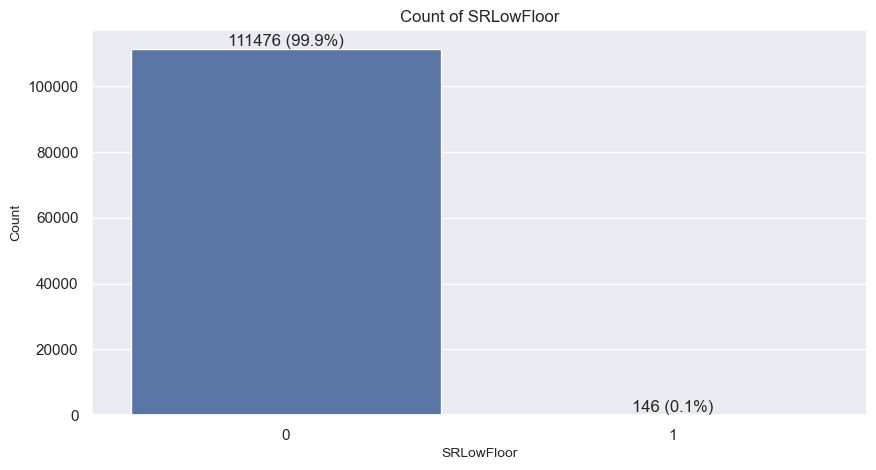

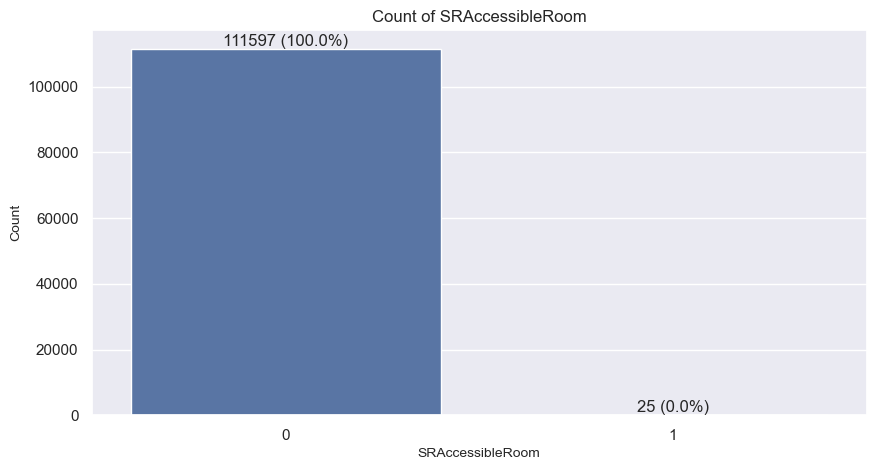

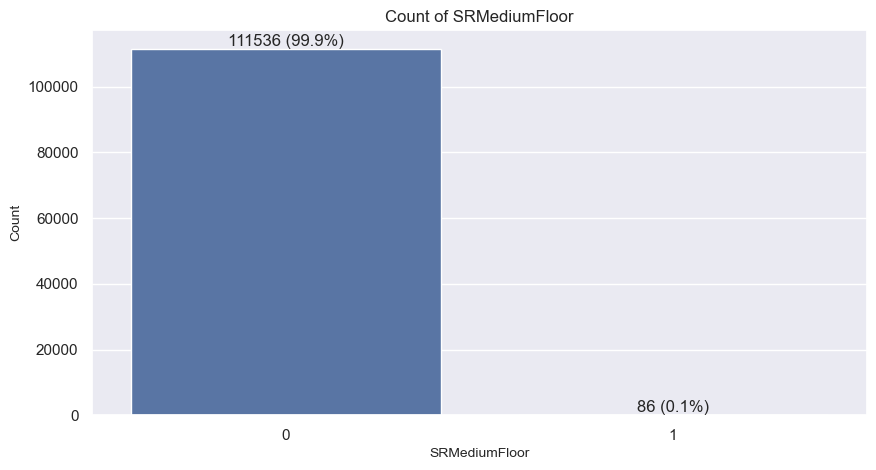

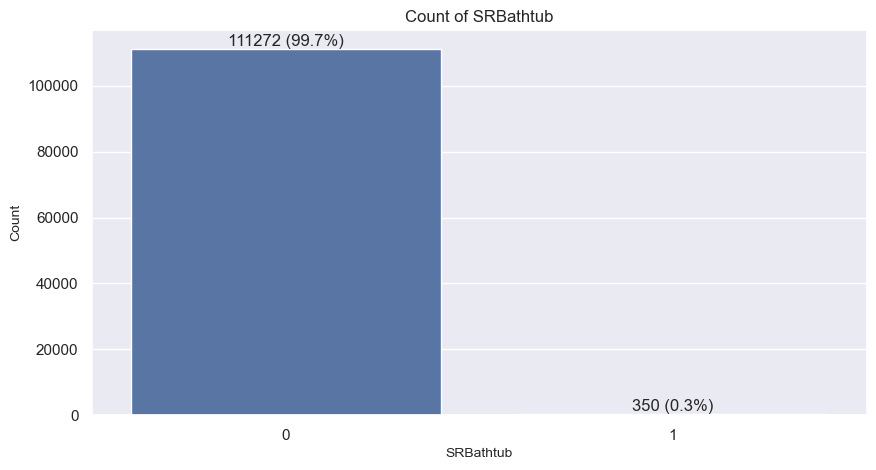

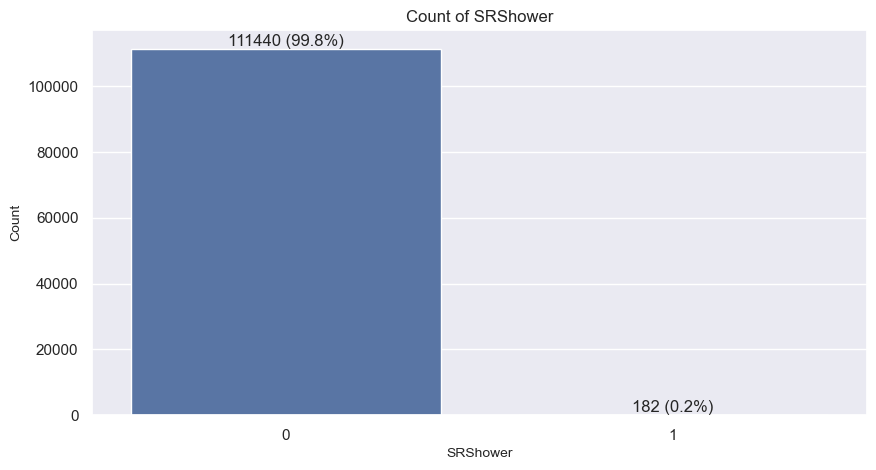

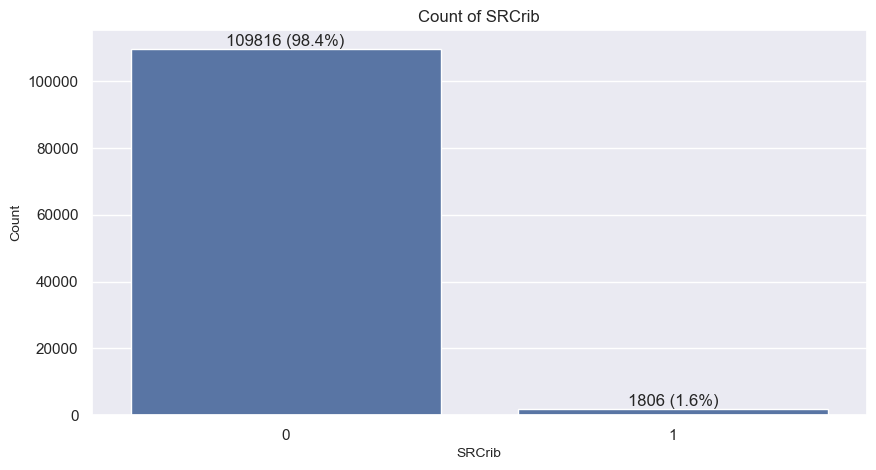

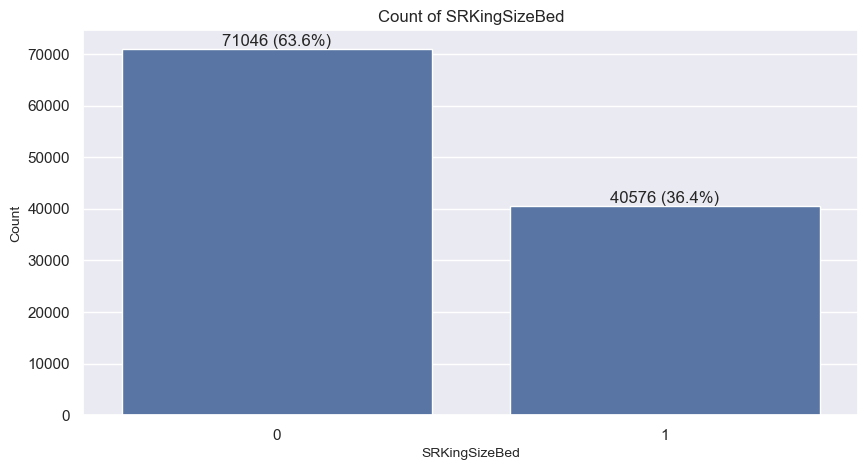

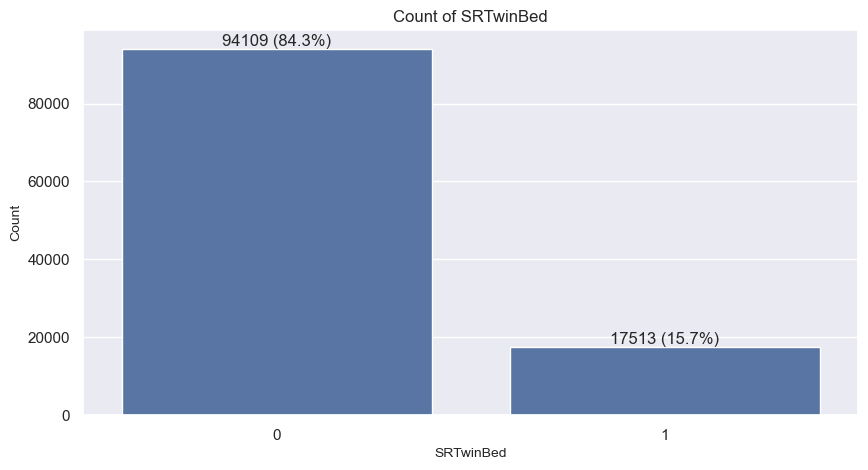

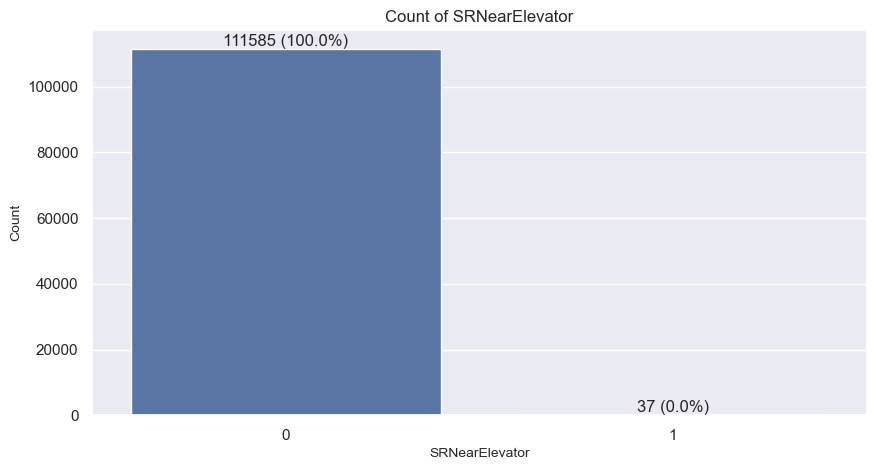

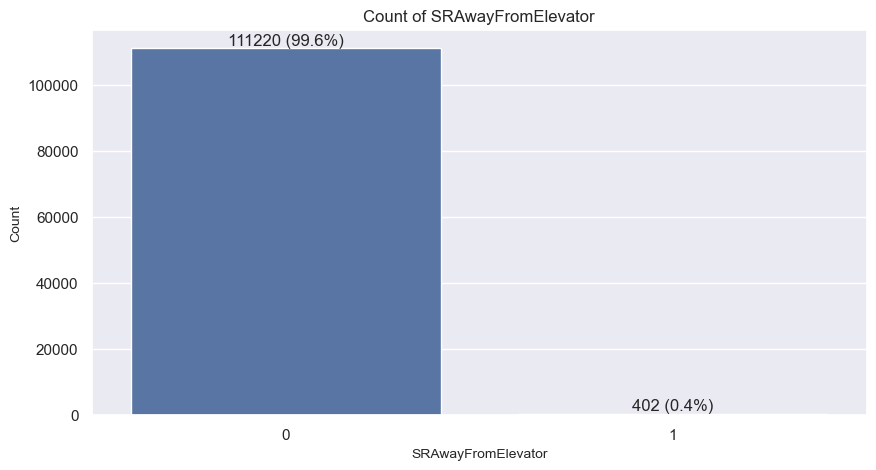

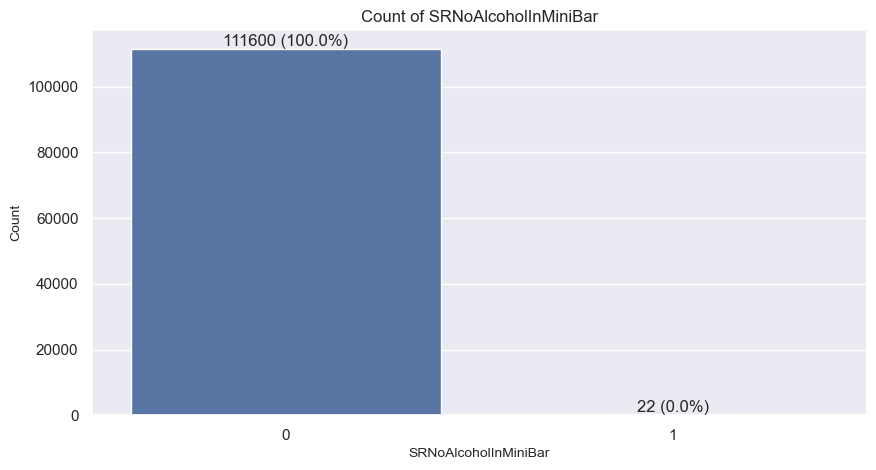

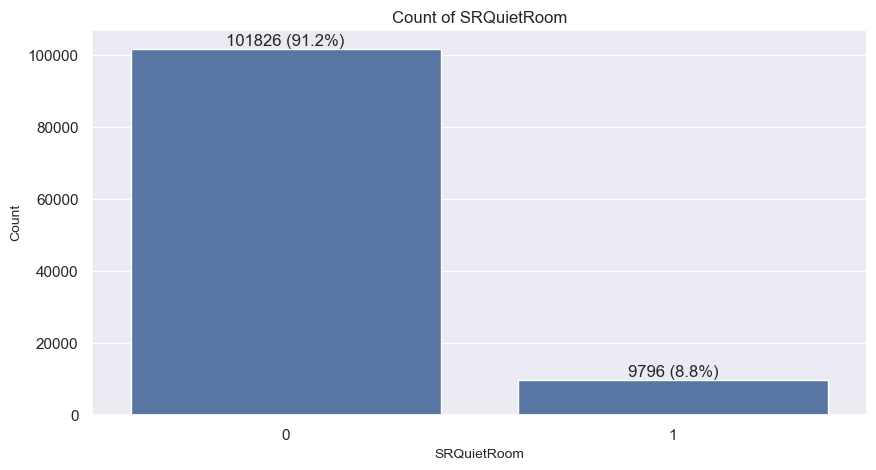

In [ ]:
# Plotting bar plots for each non-metric feature
for feature in binary_features:
    plt.figure(figsize=(10, 5))
    ax = sns.countplot(x=feature, data=df)
    
    # Calculate the percentages
    total = len(df[feature])
    for p in ax.patches:
        count = int(p.get_height())  # Ensure count is an integer
        percentage = f'{100 * count / total:.1f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(f'{count} ({percentage})', (x, y), ha='center', va='bottom')
    
    plt.title(f'Count of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

In [ ]:
lodging_revenue_by_channel = df_eda.groupby('DistributionChannel')[['LodgingRevenue']].sum().round(1).sort_values(by='LodgingRevenue', ascending=False)
lodging_revenue_by_channel
#lodging_revenue_by_channel.plot(kind='barh', figsize=(7,4))
#plt.show()

,LodgingRevenue
DistributionChannel,
Travel Agent/Operator,25505586.2
Direct,4981176.1
Corporate,1027637.1
GDS Systems,201156.1


In [ ]:
# Select columns starting with 'SR'
sr_columns = [col for col in df.columns if col.startswith('SR')]

# Melt the DataFrame to have all 'SR' columns in a single column
df_melted = df.melt(value_vars=sr_columns, var_name='SR', value_name='value')

# Group by the 'value' column (0 or 1) and count the occurrences
grouped_counts = df_melted.groupby(['SR', 'value']).size().unstack(fill_value=0)

grouped_counts


value,0,1
SR,,
SRAccessibleRoom,111708,25
SRAwayFromElevator,111331,402
SRBathtub,111383,350
SRCrib,109925,1808
SRHighFloor,106983,4750
SRKingSizeBed,71144,40589
SRLowFloor,111587,146
SRMediumFloor,111647,86
SRNearElevator,111696,37


In [ ]:
df_eda.groupby('DistributionChannel')[['Age', 'LodgingRevenue', 'OtherRevenue', 'AverageLeadTime', 'DaysSinceCreation' ,'RoomNights']].mean().round()

,Age,LodgingRevenue,OtherRevenue,AverageLeadTime,DaysSinceCreation,RoomNights
DistributionChannel,,,,,,
Corporate,47.0,328.0,67.0,30.0,716.0,3.0
Direct,43.0,295.0,65.0,40.0,542.0,2.0
GDS Systems,44.0,289.0,36.0,21.0,536.0,2.0
Travel Agent/Operator,46.0,280.0,65.0,66.0,601.0,2.0


In [ ]:
df_eda.head(2)

,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,country_name
ID,,,,,,,,,,,,,,,,,,,,,
1,52.0,440,0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...,0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...,59,292.0,82.3,1,0,2,...,0,0,0,0,0,0,0,0,0,Portugal
2,NaN,1385,0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,Portugal


C:\Users\gonca_wvx8e21\AppData\Local\Temp\ipykernel_22168\3038607997.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90, horizontalalignment='right')


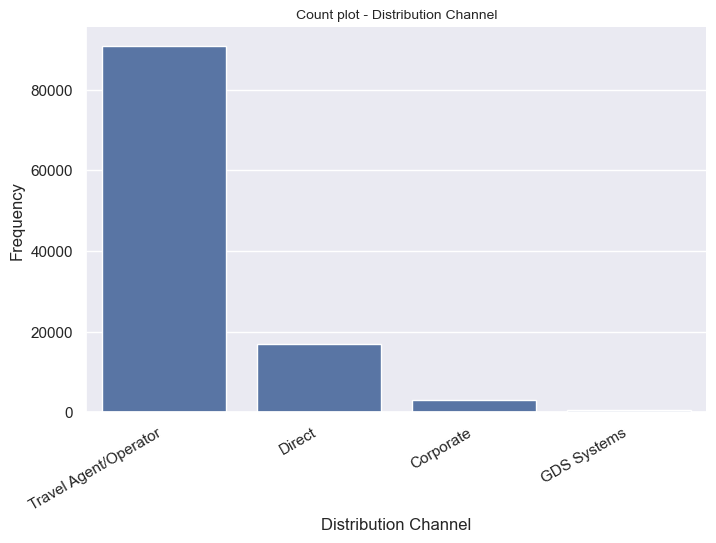

In [123]:

fig, ax = plt.subplots(figsize=(8, 5))

# Sort the 'MarketSegment' by frequency
order = df['DistributionChannel'].value_counts().index

# Plot the countplot with sorted order
g = sns.countplot(data=df, x='DistributionChannel', order=order)

# Rotate X-axis labels
g.set_xticklabels(g.get_xticklabels(), rotation=90, horizontalalignment='right')

# Decoration
sns.despine()
plt.title("Count plot - Distribution Channel", fontsize=10)
plt.xlabel("Distribution Channel")
plt.ylabel("Frequency")
plt.rc('axes', labelsize=12)
plt.xticks(rotation=30)

plt.show()

C:\Users\gonca_wvx8e21\AppData\Local\Temp\ipykernel_22168\2637230996.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90, horizontalalignment='right')


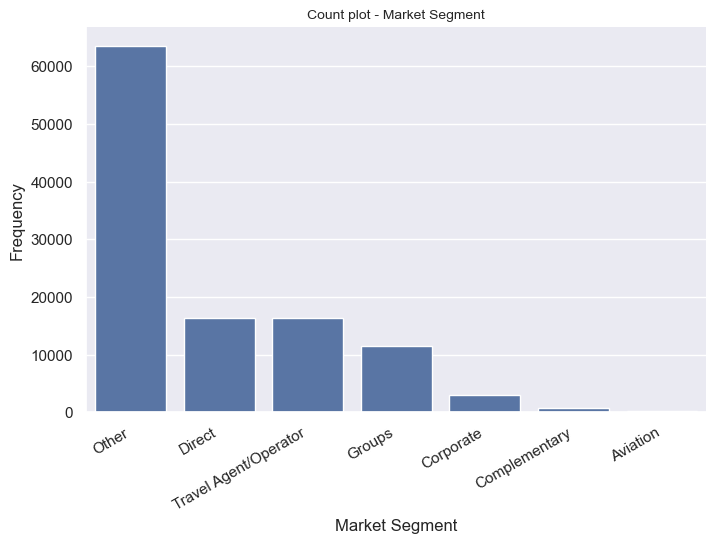

In [124]:

fig, ax = plt.subplots(figsize=(8, 5))

# Sort the 'MarketSegment' by frequency
order = df['MarketSegment'].value_counts().index

# Plot the countplot with sorted order
g = sns.countplot(data=df, x='MarketSegment', order=order)

# Rotate X-axis labels
g.set_xticklabels(g.get_xticklabels(), rotation=90, horizontalalignment='right')

# Decoration
sns.despine()
plt.title("Count plot - Market Segment", fontsize=10)
plt.xlabel("Market Segment")
plt.ylabel("Frequency")
plt.rc('axes', labelsize=12)
plt.xticks(rotation=30)

plt.show()

In [119]:
# Filter the DataFrame to get rows where 'DistributionChannel' is different from 'MarketSegment'
different_distribution_channel = df[df['DistributionChannel'] != df['MarketSegment']]

# Count the number of rows where 'DistributionChannel' is different from 'MarketSegment'
count_different_distribution_channel = different_distribution_channel.shape[0]
print(f"Number of rows where DistributionChannel is different from MarketSegment: {count_different_distribution_channel}")

Number of rows where DistributionChannel is different from MarketSegment: 77240


Market Segment and Distribution Channel

In [126]:
# Exploration of categorical variables: DistributionChannel and MarketSegment

table1 = pd.crosstab(index=df['DistributionChannel'], columns=df['MarketSegment'], margins=True, margins_name="Total")
table1

MarketSegment,Aviation,Complementary,Corporate,Direct,Groups,Other,Travel Agent/Operator,Total
DistributionChannel,,,,,,,,
Corporate,281,19,2204,13,480,37,99,3133
Direct,0,508,51,15965,171,151,30,16876
GDS Systems,0,0,2,7,5,677,5,696
Travel Agent/Operator,7,128,674,373,10794,62728,16213,90917
Total,288,655,2931,16358,11450,63593,16347,111622


By looking at the totals whe can assess that the categories "Aviation" and "Complementary" should be grouped into "Other" since they account for a very small percentage of the Market Segment. By doing this it will be easier for us to segment the market with less categories.

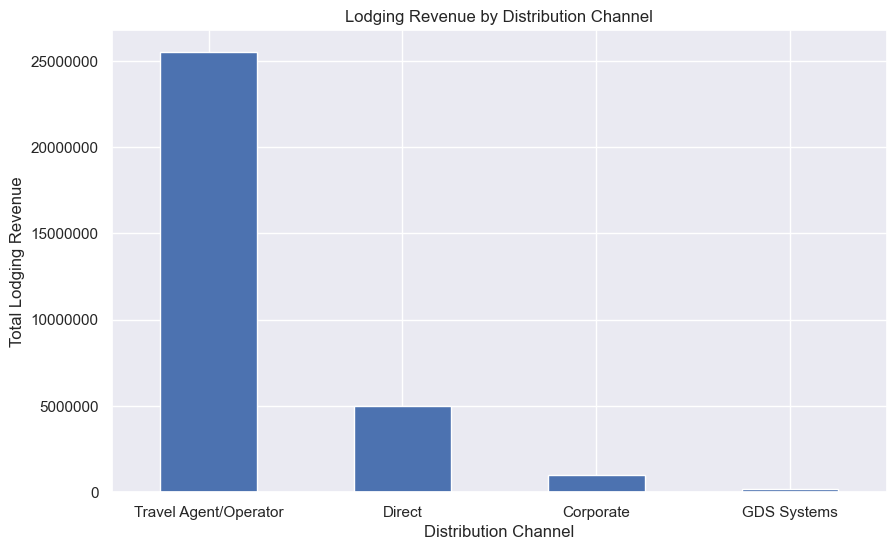

In [135]:
# Group by 'DistributionChannel' and sum the 'LodgingRevenue'
revenue_channel = df.groupby('DistributionChannel')['LodgingRevenue'].sum().sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
revenue_channel.plot(kind='bar')
plt.title('Lodging Revenue by Distribution Channel')
plt.xlabel('Distribution Channel')
plt.ylabel('Total Lodging Revenue')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Represents the % of sales of each distribution channel
total_revenue = df['LodgingRevenue'].sum()
percentage_revenue_by_channel = ((revenue_channel / total_revenue) * 100).round(2)
percentage_revenue_by_channel

DistributionChannel
Travel Agent/Operator    80.42
Direct                   15.71
Corporate                 3.24
GDS Systems               0.63
Name: LodgingRevenue, dtype: float64

The amount of money spent per distribution channel is positively correlated with the frequency they are used.

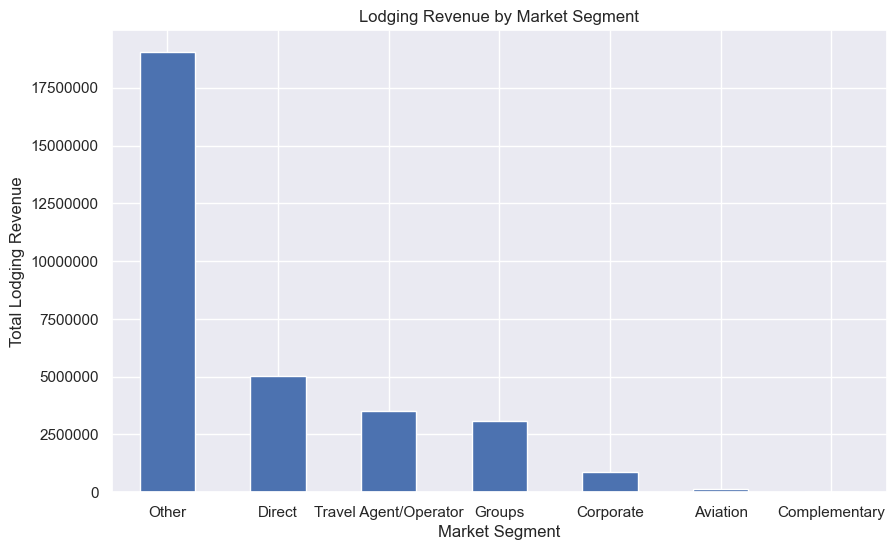

In [142]:
# Group by 'MarketSegment' and sum the 'LodgingRevenue'
revenue_by_marketsegment = df.groupby('MarketSegment')['LodgingRevenue'].sum().sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
revenue_by_marketsegment.plot(kind='bar')
plt.title('Lodging Revenue by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Total Lodging Revenue')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=0)
plt.show()

In [144]:
# Represents the % of sales of each Market Segment

total_revenue_marketsegment = df['LodgingRevenue'].sum()
percentage_revenue_by_marketsegment = ((revenue_by_marketsegment / total_revenue_marketsegment) * 100).round(2)
percentage_revenue_by_marketsegment

MarketSegment
Other                    60.04
Direct                   15.81
Travel Agent/Operator    11.03
Groups                    9.77
Corporate                 2.82
Aviation                  0.48
Complementary             0.05
Name: LodgingRevenue, dtype: float64

The Market Segment follows the same logic has the Distribution Channel, the higher the frequency of the category, the higher the revenue associated with it

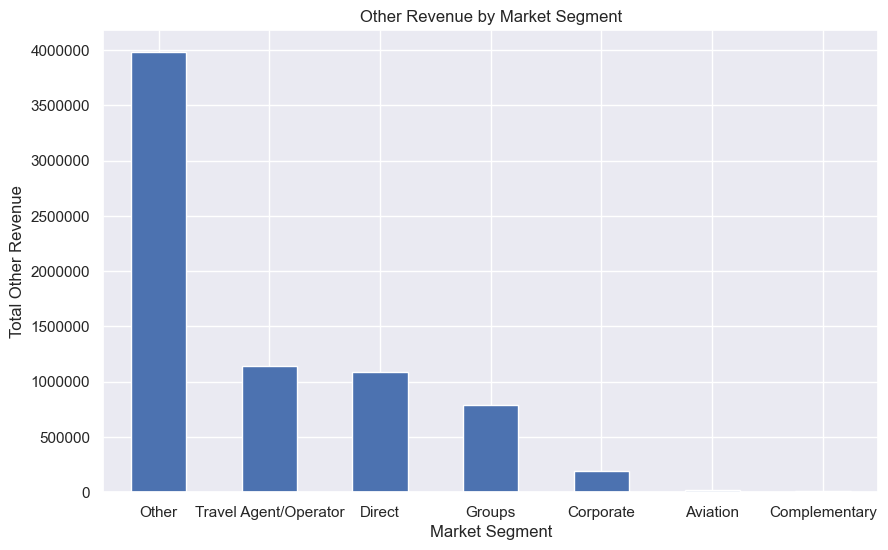

In [147]:
# Group by 'MarketSegment' and sum the 'OtherRevenue'
revenue_by_marketsegment_other = df.groupby('MarketSegment')['OtherRevenue'].sum().sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
revenue_by_marketsegment_other.plot(kind='bar')
plt.title('Other Revenue by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Total Other Revenue')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=0)
plt.show()

In [148]:
# Represents the % of sales of each category

total_revenue_marketsegment2 = df['OtherRevenue'].sum()
percentage_revenue_by_marketsegment = ((revenue_by_marketsegment_other / total_revenue_marketsegment2) * 100).round(2)
percentage_revenue_by_marketsegment

MarketSegment
Other                    55.09
Travel Agent/Operator    15.84
Direct                   15.09
Groups                   10.91
Corporate                 2.60
Aviation                  0.32
Complementary             0.14
Name: OtherRevenue, dtype: float64

The same logic applies to other revenue

<Figure size 800x600 with 0 Axes>

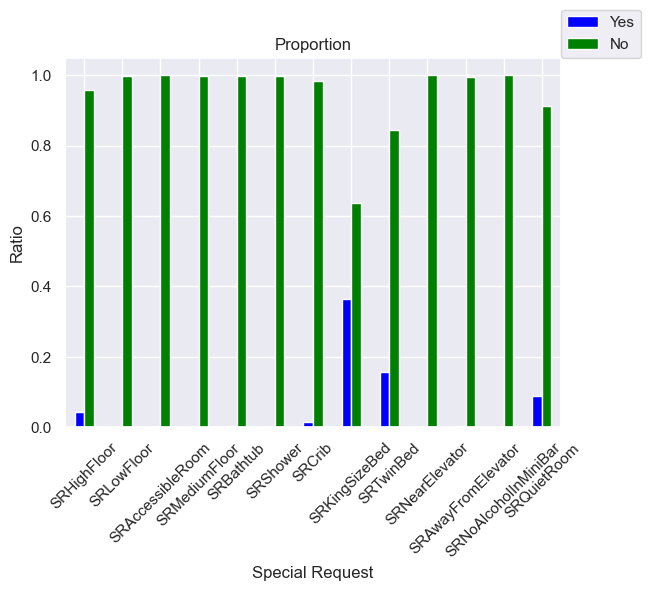

In [151]:
df2 = df[['SRHighFloor', 'SRLowFloor',
       'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib',
       'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom']]

proportions = pd.DataFrame({
    'Yes': df2.mean(),
    'No': 1 - df2.mean()
})

plt.figure(figsize=(8, 6))
proportions.plot(kind='bar', color=['blue', 'green'])
plt.title('Proportion')
plt.xlabel('Special Request')
plt.ylabel('Ratio')
plt.legend(loc=(1,1))
plt.xticks(rotation=45)
plt.show()

The majority of the requests made are related to King Size Bed, Twin Bed, No Alcochol in Mini Bar, High Floor and Crib

Correlation Matrix


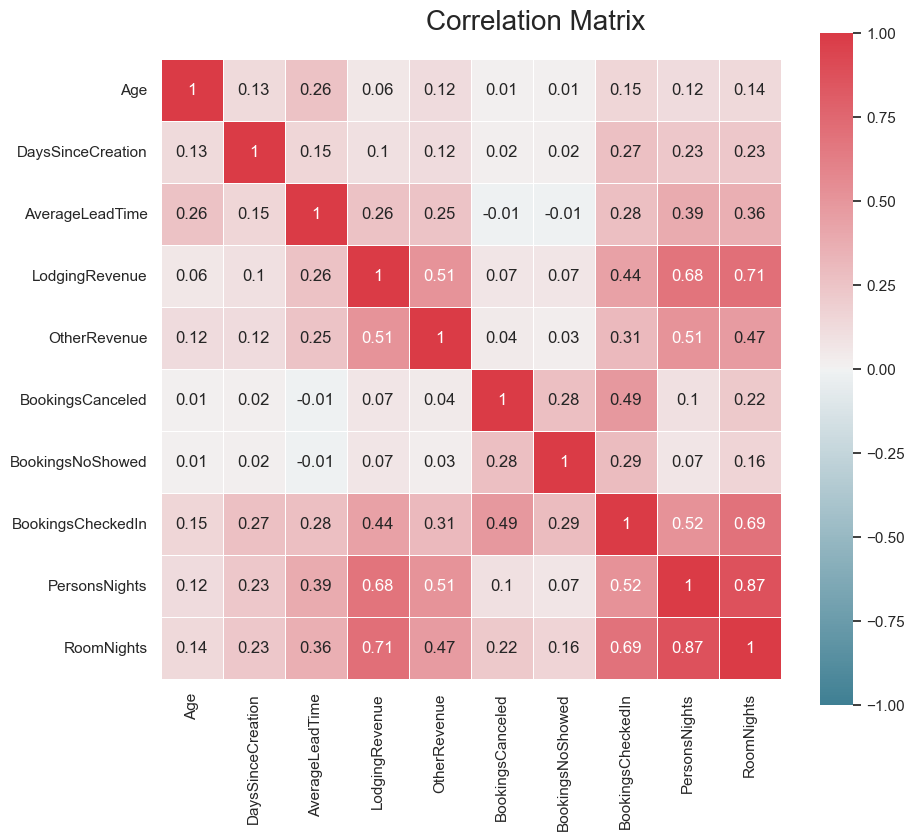

In [ ]:

fig = plt.figure(figsize=(10, 8))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(df[metric_features].corr(method="pearson"), decimals=2)

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=corr.values, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='g', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)

plt.show()

In [113]:
# Count customers under 18
underage_count = df[df["Age"] < 18].shape[0]
print(f"Number of customers under 18: {underage_count}")

Number of customers under 18: 6889


In [114]:
# Filter customers under 18
df_underage = df[df["Age"] < 18]

# Summarize their lodging and other revenue
underage_revenue = df_underage[['LodgingRevenue', 'OtherRevenue']].describe()

# Display the summary
print(underage_revenue)

       LodgingRevenue  OtherRevenue
count     6889.000000   6889.000000
mean       102.032474     21.745477
std        347.824107     86.451454
min          0.000000      0.000000
25%          0.000000      0.000000
50%          0.000000      0.000000
75%          0.000000      0.000000
max       5237.100000   2012.400000


In [115]:
market_segment_counts = df_underage["MarketSegment"].value_counts()
print(market_segment_counts)

MarketSegment
Other                    4630
Direct                   1595
Travel Agent/Operator     508
Groups                     81
Complementary              47
Corporate                  26
Aviation                    2
Name: count, dtype: int64


<div class="alert alert-block alert-success">

<a class="anchor" id="1st-bullet">    </a>
## 4. Data Cleaning
    

</div>

<div class="alert alert-block alert-success">

<a class="anchor" id="1st-bullet">    </a>
## 5. Features
    

</div>

**For Kmeans we should use features that can be measure such as**:
- Age
- DaysSinceCreation
- AverageLeadTime
- LodgingRevenue
- OtherRevenue
- PersonsNights
- RoomNights
- Bookings

<div class="alert alert-block alert-success">

<a class="anchor" id="1st-bullet">    </a>
## 6. Models
    

</div>

<div class="alert alert-block alert-success">

<a class="anchor" id="1st-bullet">    </a>
## 7. Clusters Analysis and Recommendations
    

</div>